In [1]:
from tensorflow import keras

In [2]:
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

In [3]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [4]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


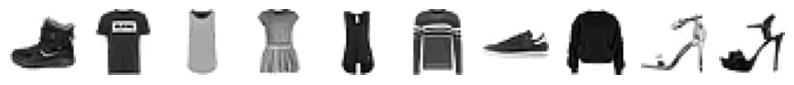

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize = (10, 10))
for  i in range(10):
    axs[i].imshow(train_input[i], cmap = 'gray_r')
    axs[i].axis('off')
plt.show()

In [6]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [7]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [8]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)

In [9]:
print(train_scaled.shape)

(60000, 784)


In [10]:
from sklearn.model_selection import cross_validate

In [11]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)

In [12]:
print(scores['test_score'])

[0.82908333 0.81941667 0.82075    0.80916667 0.818     ]


In [13]:
sc = SGDClassifier(loss = 'log_loss', max_iter=10, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)

In [14]:
print(np.mean(scores['test_score']))

0.8313833333333334


In [15]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [16]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [17]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [18]:
dense = keras.layers.Dense(10, activation='softmax', input_shape = (784,))

In [19]:
model = keras.Sequential(dense)

In [20]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')

In [21]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [22]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6075 - accuracy: 0.7934
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4740 - accuracy: 0.8393
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4495 - accuracy: 0.8477
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4371 - accuracy: 0.8520
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4299 - accuracy: 0.8543


In [23]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4325 - accuracy: 0.8528


[0.43251290917396545, 0.8527500033378601]

In [24]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape = (784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [25]:
model = keras.Sequential([dense1, dense2])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape = (784,), name = 'hidden'),
    keras.layers.Dense(10, activation='softmax', name = 'output')
], name = '패션 MNIST 모델')

In [28]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape = (784,)))
model.add( keras.layers.Dense(10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5706 - accuracy: 0.8046
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4112 - accuracy: 0.8521
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3770 - accuracy: 0.8650
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3539 - accuracy: 0.8717
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3355 - accuracy: 0.8781


In [32]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3481 - accuracy: 0.8740


[0.3481295108795166, 0.8740000128746033]

In [33]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0

In [36]:
train_scaled.shape

(60000, 28, 28)

In [37]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [38]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5295 - accuracy: 0.8126
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3958 - accuracy: 0.8581
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3577 - accuracy: 0.8717
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3349 - accuracy: 0.8782
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3188 - accuracy: 0.8851


In [39]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3712 - accuracy: 0.8703


[0.37124958634376526, 0.8703333139419556]

In [40]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [41]:
sgd = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [42]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2877 - accuracy: 0.8944
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.8996
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2636 - accuracy: 0.9008
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2561 - accuracy: 0.9045
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2482 - accuracy: 0.9080


In [43]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3355 - accuracy: 0.8798


[0.3355354368686676, 0.8798333406448364]

In [44]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [45]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2379 - accuracy: 0.9117
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2315 - accuracy: 0.9145
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2258 - accuracy: 0.9160
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2221 - accuracy: 0.9169
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2173 - accuracy: 0.9189


In [46]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3203 - accuracy: 0.8861


[0.3203412592411041, 0.8860833048820496]

In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [48]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2440 - accuracy: 0.9092
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2358 - accuracy: 0.9124
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2277 - accuracy: 0.9150
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2192 - accuracy: 0.9172
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2146 - accuracy: 0.9199


In [49]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3342 - accuracy: 0.8856


[0.33421608805656433, 0.8855833411216736]

In [50]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [51]:
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [52]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


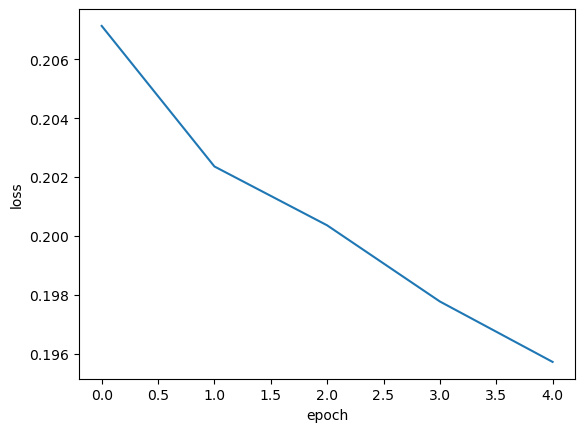

In [53]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [54]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [55]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [56]:
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [57]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


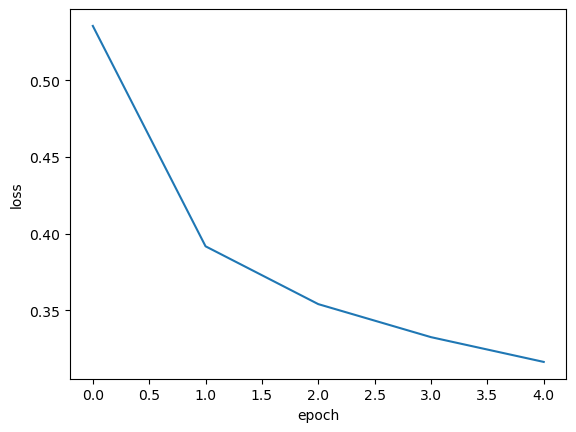

In [58]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

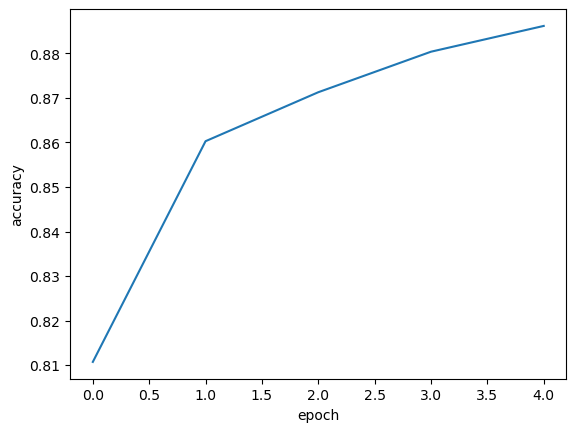

In [59]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [60]:
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

In [61]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


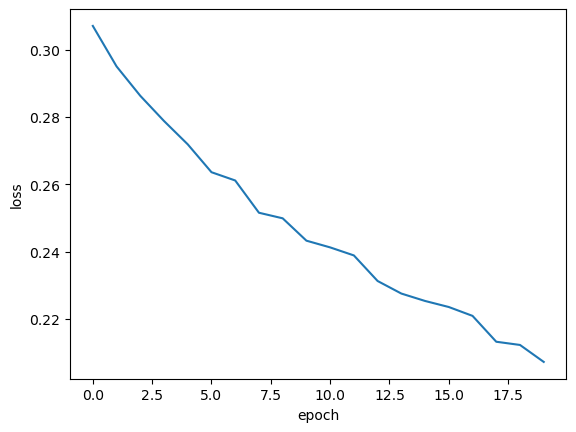

In [62]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [63]:
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [64]:
model = model_fn()

In [65]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5293 - accuracy: 0.8149
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3907 - accuracy: 0.8593
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3535 - accuracy: 0.8721
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3303 - accuracy: 0.8806
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3137 - accuracy: 0.8863
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3037 - accuracy: 0.8898
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2931 - accuracy: 0.8949
Epoch 8/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2867 - accuracy: 0.8982
Epoch 9/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2761 - accuracy: 0.9012
Epoch 10/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.272

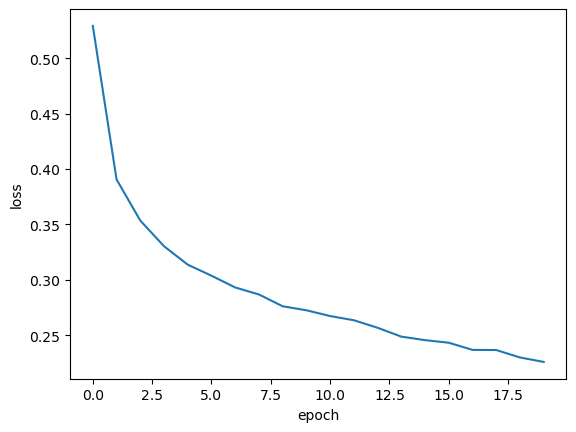

In [67]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [68]:
model = model_fn()

In [69]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                   validation_data=(val_scaled, val_target))

In [70]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


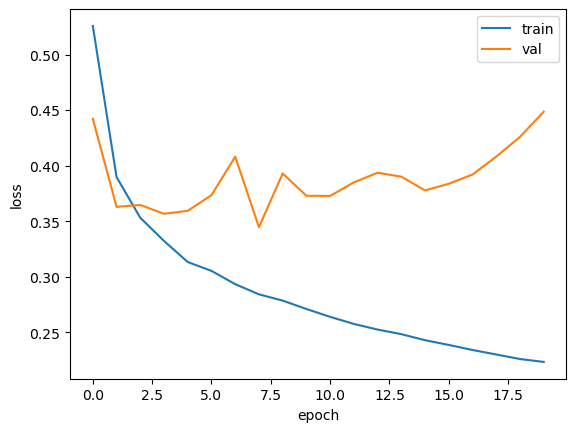

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

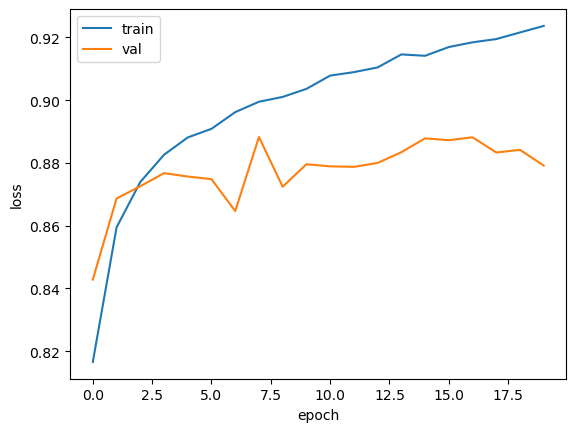

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [73]:
model = model_fn(keras.layers.Dropout(0.3))

In [74]:
model=model_fn(keras.layers.Dropout(0.3))

In [75]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


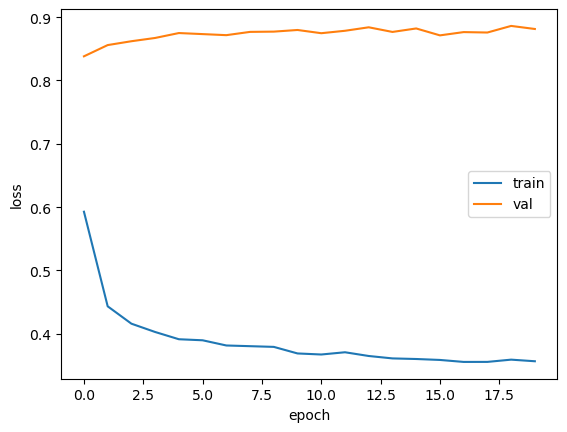

In [76]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                   validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [77]:
model = model_fn()

In [78]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0,
                   validation_data=(val_scaled, val_target))
model.save_weights('model-weights.h5')

In [79]:
model.save('model-whole.h5')

C:\Users\bbong\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [80]:
model = model_fn(keras.layers.Dropout(0.3))

In [81]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [82]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 2.4062 - accuracy: 0.1011


[2.4061591625213623, 0.10108333081007004]

In [83]:
model.load_weights('model-weights.h5')

In [84]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3721 - accuracy: 0.8727


[0.37214428186416626, 0.8727499842643738]

In [85]:
model1 = keras.models.load_model('model-whole.h5')

In [86]:
model1.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3721 - accuracy: 0.8727


[0.37214428186416626, 0.8727499842643738]

In [87]:
# 추가
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_label == val_target))

375/375 [==============================] - 1s 2ms/step


In [91]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                   validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

C:\Users\bbong\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [92]:
print(early_stopping_cb.stopped_epoch)

7


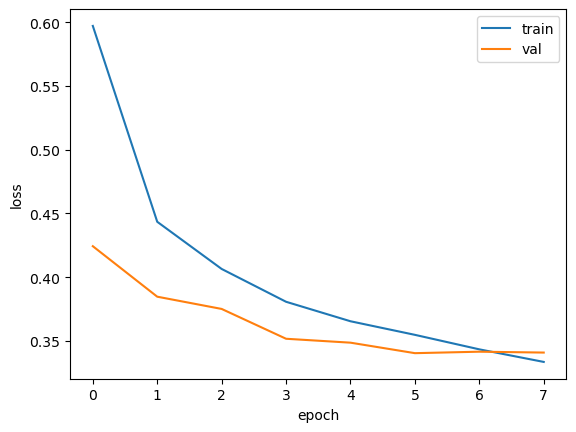

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [94]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3404 - accuracy: 0.8762


[0.3404022455215454, 0.8761666417121887]

In [95]:
print(history.history['val_loss'])

[0.424290269613266, 0.3846968114376068, 0.37509143352508545, 0.3517015278339386, 0.34863489866256714, 0.3404022455215454, 0.34155628085136414, 0.3408740162849426]
